## **A Dive into Wine**

---



## **Section 1: Research and Data Exploration**

### **Related Work & Data Exploration**

#### **Dataset Overview**
The **Wine dataset** includes features that specify the makeup of numerous wines via their chemical properties. As-well as a wine class target classification '**class**' that indicates to which each wine class they belong. The aim is to classify said wine(s) into one of the three wine class labels (1,2 or 3). The objective is more thoroughly described below.

#### **Objectives**
The main objective of my project is to **efficiently predict and classify wines into 3 wine types via their chemical properties** using a **Random Forest classifier model**. The wine classes are represented in the Nominal Qualitative data integer values (1, 2 or 3). Therefore the Random Forest Classifier will classify a range of 3 values.

#### **Data Exploration**

Below I will explore the wine dataset and return **both graphs and textual outputs** to better showcase the sequential exploration of the data that begins below. As well as internal **commentary** and below explanationary text to better explain the thought-process and point of each step and code-block.

In [ ]:
# Import dependencies for use in Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The above imported modules are required for using pandas data frame objects, numpy array methods and seaborn and matplotlib for the visual graphs. e.g. class diagrams and feature correlation graphs etc.

In [ ]:
# Source the dataframe from the link provided that the dataset is hosted on, and make it a pandas DataFrame
df = pd.read_csv('https://archive.ics.uci.edu/static/public/109/data.csv')

# Output the first 10 instances of the dataframe 'df'
print(df.head(10))

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   
5    14.20       1.76  2.45               15.2        112           3.27   
6    14.39       1.87  2.45               14.6         96           2.50   
7    14.06       2.15  2.61               17.6        121           2.60   
8    14.83       1.64  2.17               14.0         97           2.80   
9    13.86       1.35  2.27               16.0         98           2.98   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1    

The Dataset has correctly been loaded and converted to a pandas DataFrame as the expected instances are present above.

In [ ]:
 # Get the number of instances and features of the Feature dataset
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 178 rows, and 14 columns


The size of the dataset is therefore quite small, with only 178 instances and 14 features. Small datasets tend to be less efficient than large datasets as it has less information to infer and work on and predict.

#### **Missing Values Handling**

In [ ]:
# Check for any Missing Values
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

No missing data in the 'df' dataframe so it is unnecessary to handle missing data.

#### **Feature Engineering**

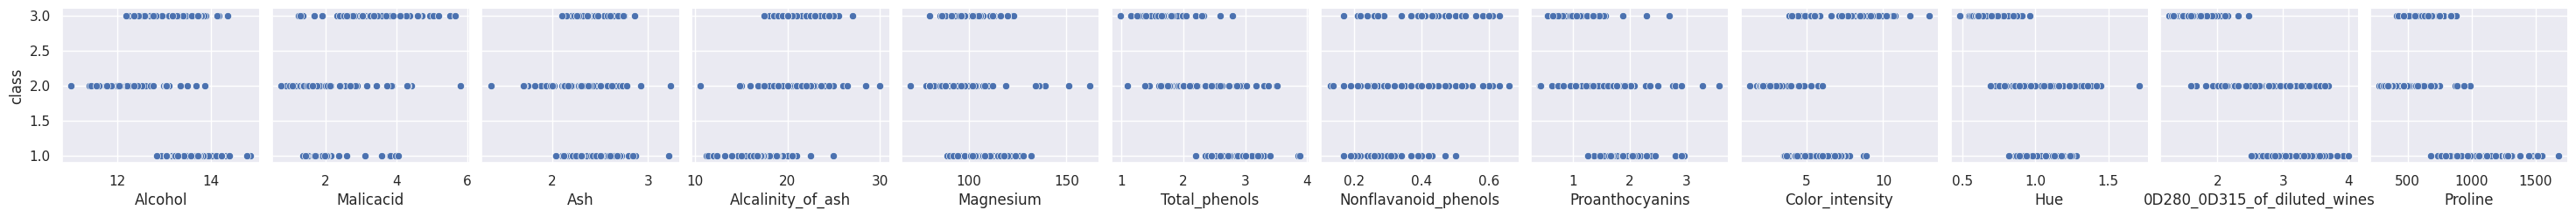

In [ ]:
# Visualising the input features and the target variable Class
import seaborn as sns

# set the style of the below plot
sns.set_style('darkgrid')

# pairplot each feature(X-axis) in regard of the target 'class' y-axis.
sns.pairplot(df, x_vars=['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'], y_vars='class')

Above pairplots of each input feature to the target class is given. Each feature has lots of points belonging to one of the three class axex. And are despite looking similiar on the surface all unique in their spread.

In [ ]:
# Get the type of the 'df' object (pandas DataFrame)
print(f'The type of wine dataframe df is {type(df)}')

The type of wine dataframe df is <class 'pandas.core.frame.DataFrame'>


We are dealing with pandas DataFrames for the wine df object. Meaning that the dataset has correctly been converted into a pandas data frame allowing for easier and more comprehensive handling of the dataset and access to the wide array of pandas methods.

In [ ]:
# Get the name of the features and display them
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

The above features are all to describe the chemical makeup and the target classification of each wine hence the scientific column names. As all the expected input classes and the target feature class are present, it indicates that all the required features are correctly present and have the correct feature names and order.

In [ ]:
# Get the first 5 instances of the Wine features dataset to showcase the 'df' structure.
df.head()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

The brief header of the dataframe also shows that the data is correctly displayed and parsed as expected and that no errors are current present.

In [ ]:
# Get the datatype of each feature in the 'df' dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

This means that the model will deal with both integers and floating point numbers. With most of the input features being of type float. And more importantly the target feature 'class' being of type int, as it can only have values (1, 2 or 3).

In [ ]:
# Some quick statisical information about the wine features dataset, such as the mean, max and min value etc.
df.describe()

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

Above we get an output of useful stat info on every feature in the dataset. We get the count of each feature, mean value minimum and maximum value of each feature as well as some quartile values. It also shows the diversity in each features data as each feature has wildy different results. This is good as the model has alot more varied data to work with and less chance of overfitting.

In [ ]:
# get the unique count of each feature including the target 'class'
for i in df.columns:
  # output each feature and the number of unique values they have
  print(i, len(df[i].unique()))

Alcohol 126
Malicacid 133
Ash 79
Alcalinity_of_ash 63
Magnesium 53
Total_phenols 97
Flavanoids 132
Nonflavanoid_phenols 39
Proanthocyanins 101
Color_intensity 132
Hue 78
0D280_0D315_of_diluted_wines 122
Proline 121
class 3


Above we see the unique count of each feature, with the class target being of count 3 which is what is expected as class should only show values (1, 2 or 3) as these values are the type of wine we are classifying which is the overall objective of this Project.

#### **Class Distribution**

In [ ]:
# Class Distribution (Unvisualised) (Visualisation below)
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

This tells us that the target class has 3 different classifications. Either 1, 2, or 3. With 2 being the most numerous classification and 3 being the least. And that the class data is Nominal Qualitative data as compared to the Continuous Quantitative feature set daata.

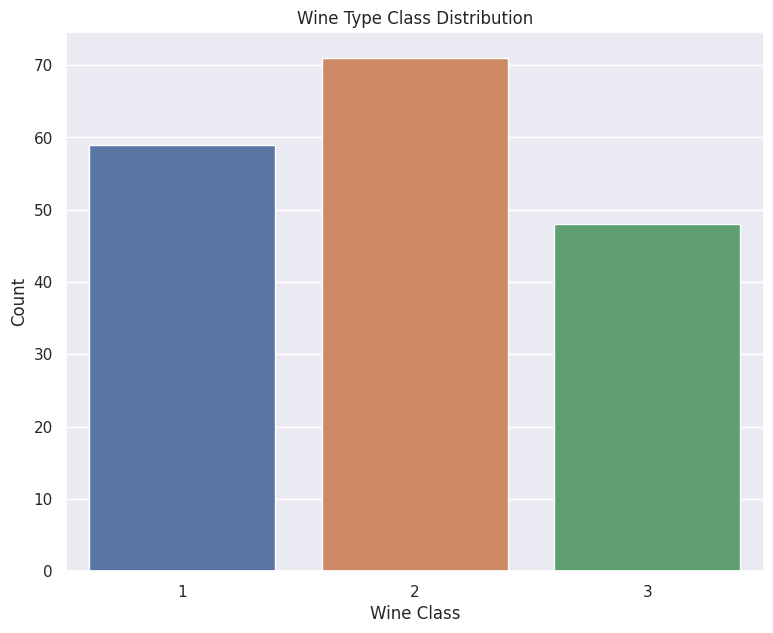

In [ ]:
# Visualising the Class Distribution using seaborn

# set seaborn style and figsize
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9,7)})

# set the target and data to be the wine dataframe
sns.countplot(x="class", data=df)

# Set plot title to describe Wine types
plt.title('Wine Type Class Distribution') # plot title

# Label axes
plt.xlabel('Wine Class') # x axis label
plt.ylabel('Count') # y axis label

# Output the class distribution plot
plt.show()

The above class distribution graph shows that the class types are not that imbalanced, with class 2 having the most occurences and class 3 having the least but with a margin of not more than ~30 occurences. Meaning that all class types have plentiful instances to predict from.

<ipython-input-108-a04052f5b317>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,7)


<Axes: xlabel='class', ylabel='Proline'>

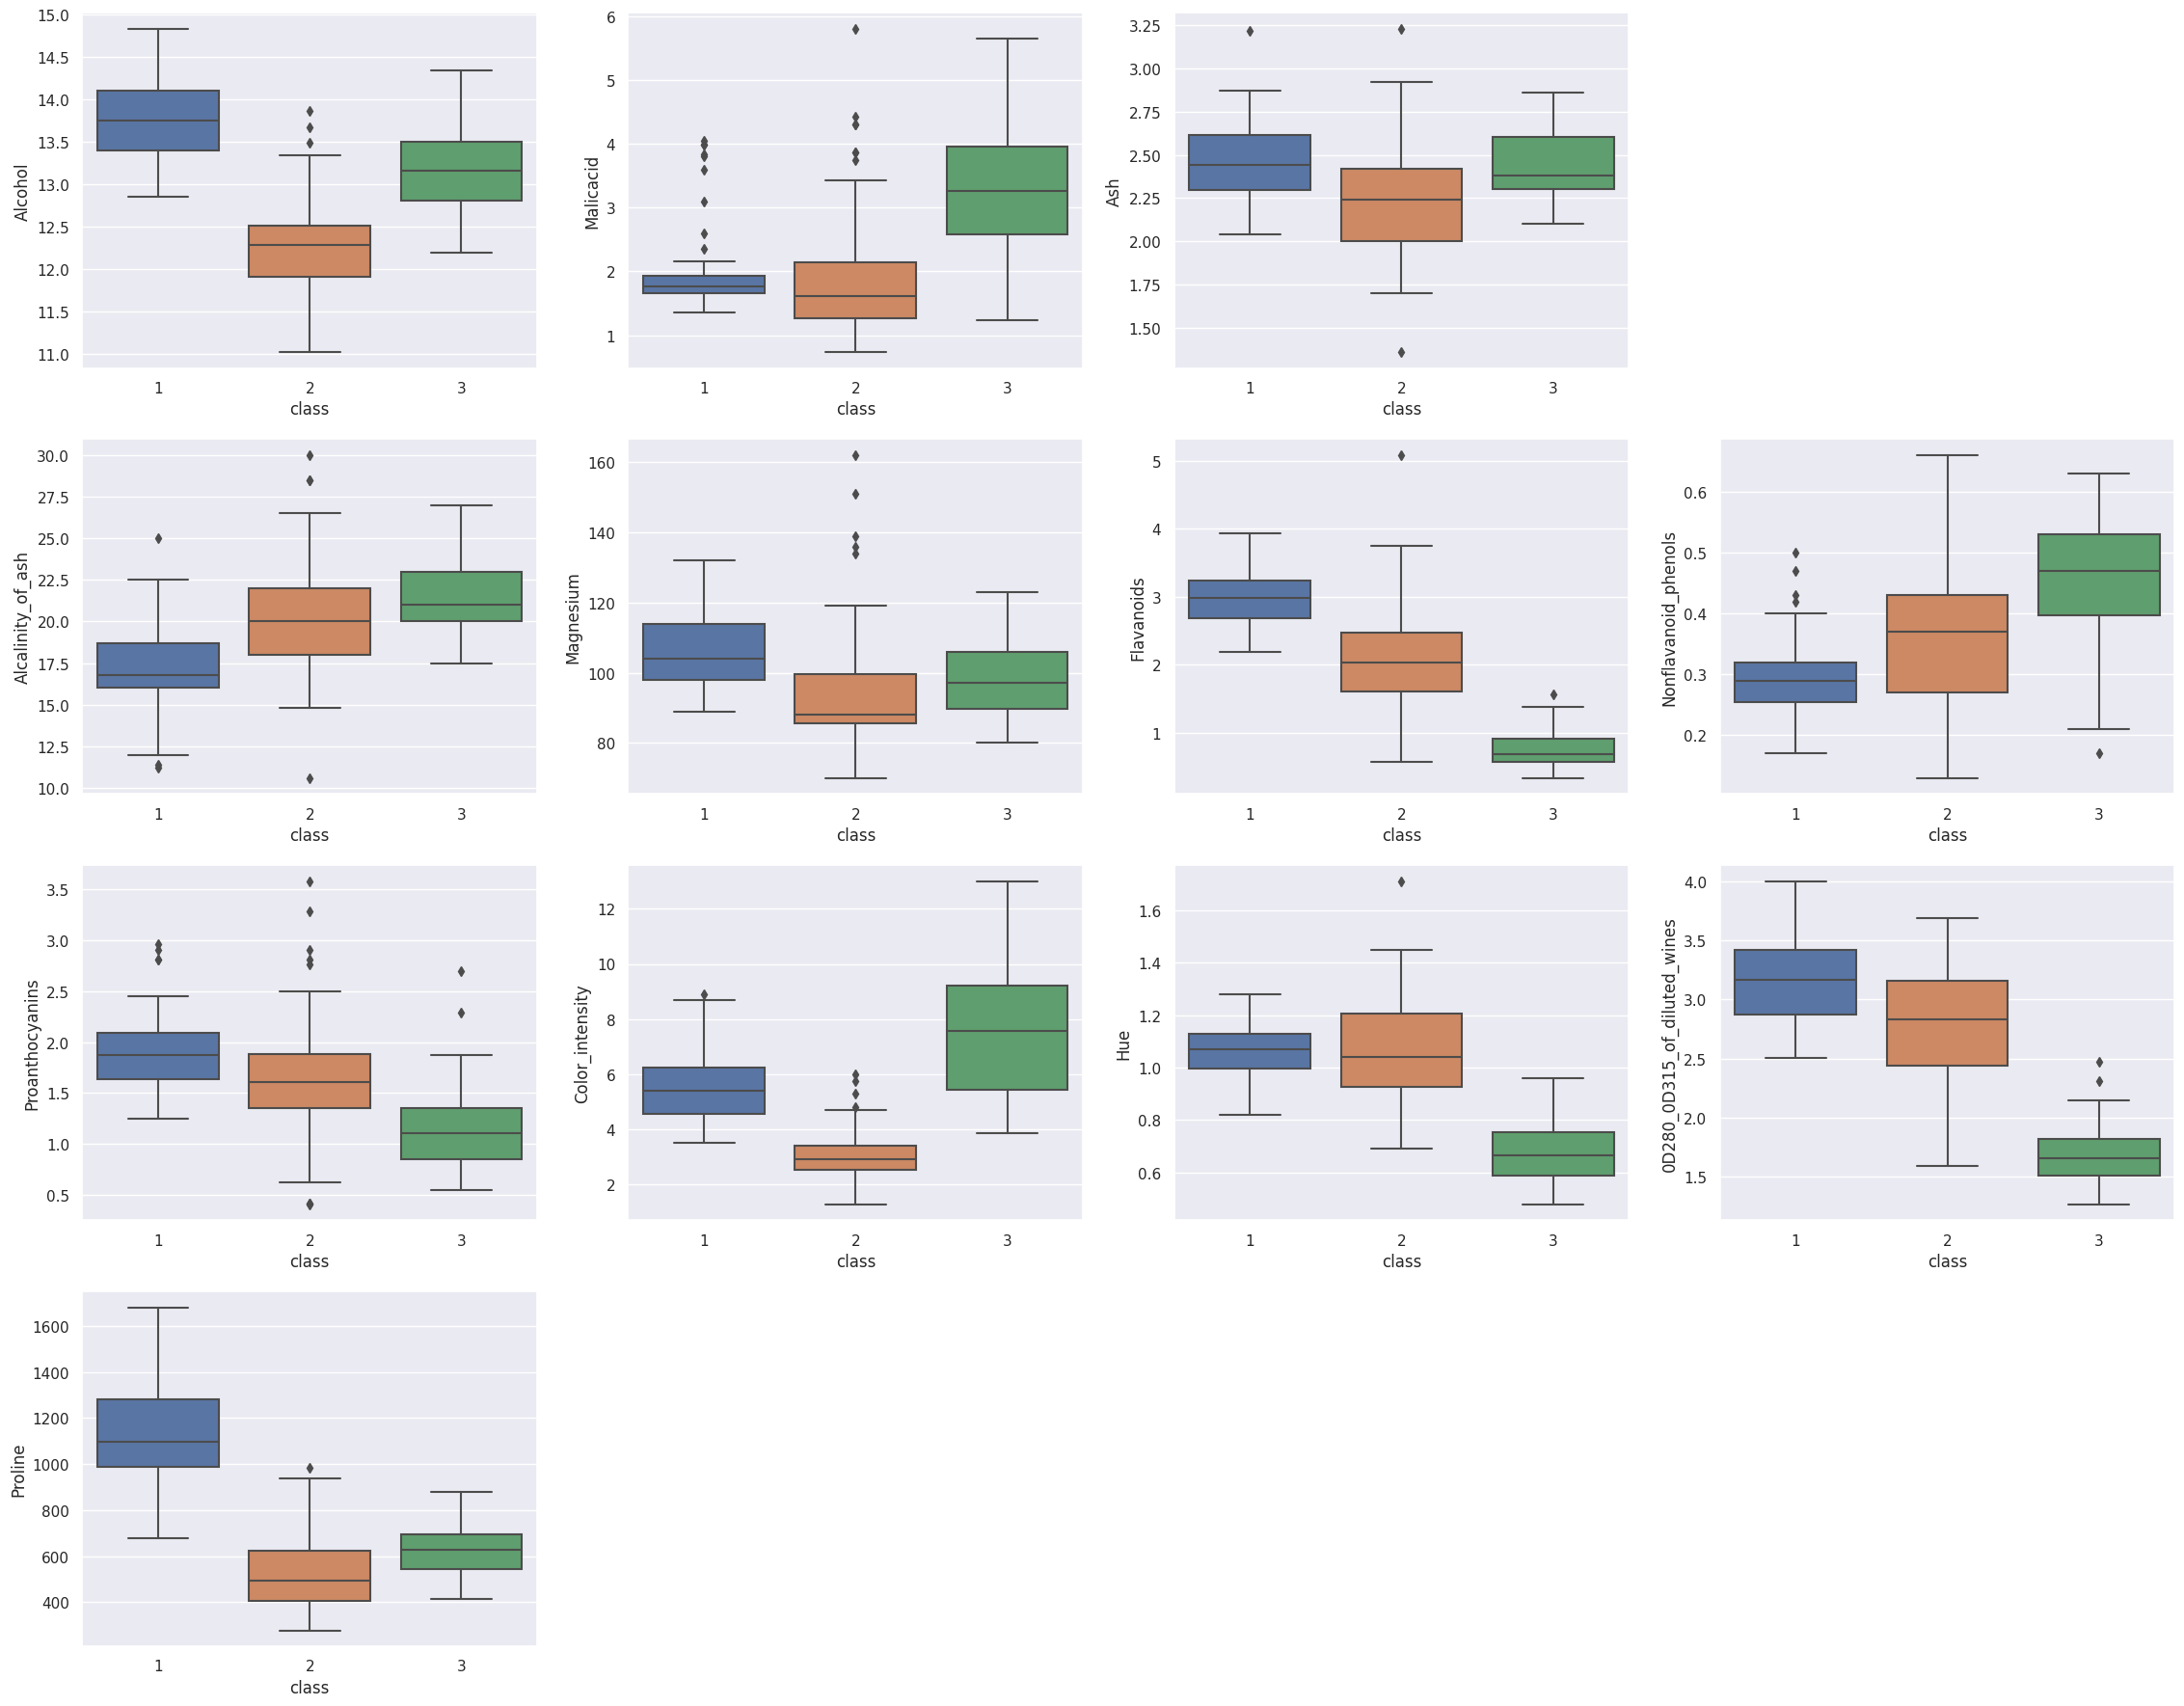

In [ ]:
# Summary Statistics - Box-plots of each Feature in relation to the target 'class'

# Set plot size
plt.figure(figsize=(28,22))

# Alcohol
plt.subplot(4,4,1)
# create a boxplot to better visualise the spread
sns.boxplot(data=df,x='class', y='Alcohol')

# Malicacid
plt.subplot(4,4,2)
sns.boxplot(data=df,x='class', y='Malicacid')

# Ash
plt.subplot(4,4,3)
sns.boxplot(data=df,x='class', y='Ash')

# Alcalinity_of_ash
plt.subplot(4,2,4)
sns.boxplot(data=df,x='class', y='Alcalinity_of_ash')

# Magnesium
plt.subplot(4,4,5)
sns.boxplot(data=df,x='class', y='Alcalinity_of_ash')

# Total_phenols
plt.subplot(4,4,6)
sns.boxplot(data=df,x='class', y='Magnesium')

# Flavanoids
plt.subplot(4,4,7)
sns.boxplot(data=df,x='class', y='Flavanoids')

# Nonflavanoid_phenols
plt.subplot(4,4,8)
sns.boxplot(data=df,x='class', y='Nonflavanoid_phenols')

# Proanthocyanins
plt.subplot(4,4,9)
sns.boxplot(data=df,x='class', y='Proanthocyanins')

# Color_intensity
plt.subplot(4,4,10)
sns.boxplot(data=df,x='class', y='Color_intensity')

# Hue
plt.subplot(4,4,11)
sns.boxplot(data=df,x='class', y='Hue')

# 0D280_0D315_of_diluted_wines
plt.subplot(4,4,12)
sns.boxplot(data=df,x='class', y='0D280_0D315_of_diluted_wines')

# Proline
plt.subplot(4,4,13)
sns.boxplot(data=df,x='class', y='Proline')

# This shows us how the range of the feature corresponds to the class value using boxplots to display the spread.

The above boxplots pits each feature against the relation of the class, the box-plots help with visualising the spread and range of the data. This shows us the diversity of each feature's relationship with the class.

#### **Feature Correlation**

In [ ]:
# Feature correlation computation of the 'df' dataframe
cor_matrix = df.corr()

# Output correlation matrix in tabular form
cor_matrix

Alcohol  Malicacid       Ash  \
Alcohol                       1.000000   0.094397  0.211545   
Malicacid                     0.094397   1.000000  0.164045   
Ash                           0.211545   0.164045  1.000000   
Alcalinity_of_ash            -0.310235   0.288500  0.443367   
Magnesium                     0.270798  -0.054575  0.286587   
Total_phenols                 0.289101  -0.335167  0.128980   
Flavanoids                    0.236815  -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929   0.292977  0.186230   
Proanthocyanins               0.136698  -0.220746  0.009652   
Color_intensity               0.546364   0.248985  0.258887   
Hue                          -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343  -0.368710  0.003911   
Proline                       0.643720  -0.192011  0.223626   
class                        -0.328222   0.437776 -0.049643   
Cluster                      -0.234874   0.002916 -0.190640   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malicacid                              0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total_phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color_intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
0D280_0D315_of_diluted_wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   
class                                  0.517859  -0.209179      -0.719163   
Cluster                                0.132159  -0.344845      -0.042813   

                              Flavanoids  Nonflavanoid_phenols  \
Alcohol                         0.236815             -0.155929   
Malicacid                      -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity_of_ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total_phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid_phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color_intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
0D280_0D315_of_diluted_wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   
class                          -0.847498              0.489109   
Cluster                         0.058676              0.016218   

                              Proanthocyanins  Color_intensity       Hue  \
Alcohol                              0.136698         0.546364 -0.071747   
Malicacid                           -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total_phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000   

Below the tabular form of the feature correlation is given, further-down a heatmap grapth of the correlation is also given to more easily depict the correlation between features.

In [ ]:
# Get the Upper triangle of the correlation matrix computed on the 'df' dataframe.
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Output the upper triangle in tabular form.
upper

Alcohol  Malicacid       Ash  Alcalinity_of_ash  \
Alcohol                           NaN   0.094397  0.211545          -0.310235   
Malicacid                         NaN        NaN  0.164045           0.288500   
Ash                               NaN        NaN       NaN           0.443367   
Alcalinity_of_ash                 NaN        NaN       NaN                NaN   
Magnesium                         NaN        NaN       NaN                NaN   
Total_phenols                     NaN        NaN       NaN                NaN   
Flavanoids                        NaN        NaN       NaN                NaN   
Nonflavanoid_phenols              NaN        NaN       NaN                NaN   
Proanthocyanins                   NaN        NaN       NaN                NaN   
Color_intensity                   NaN        NaN       NaN                NaN   
Hue                               NaN        NaN       NaN                NaN   
0D280_0D315_of_diluted_wines      NaN        NaN       NaN                NaN   
Proline                           NaN        NaN       NaN                NaN   
class                             NaN        NaN       NaN                NaN   
Cluster                           NaN        NaN       NaN                NaN   

                              Magnesium  Total_phenols  Flavanoids  \
Alcohol                        0.270798       0.289101    0.236815   
Malicacid                     -0.054575      -0.335167   -0.411007   
Ash                            0.286587       0.128980    0.115077   
Alcalinity_of_ash             -0.083333      -0.321113   -0.351370   
Magnesium                           NaN       0.214401    0.195784   
Total_phenols                       NaN            NaN    0.864564   
Flavanoids                          NaN            NaN         NaN   
Nonflavanoid_phenols                NaN            NaN         NaN   
Proanthocyanins                     NaN            NaN         NaN   
Color_intensity                     NaN            NaN         NaN   
Hue                                 NaN            NaN         NaN   
0D280_0D315_of_diluted_wines        NaN            NaN         NaN   
Proline                             NaN            NaN         NaN   
class                               NaN            NaN         NaN   
Cluster                             NaN            NaN         NaN   

                              Nonflavanoid_phenols  Proanthocyanins  \
Alcohol                                  -0.155929         0.136698   
Malicacid                                 0.292977        -0.220746   
Ash                                       0.186230         0.009652   
Alcalinity_of_ash                         0.361922        -0.197327   
Magnesium                                -0.256294         0.236441   
Total_phenols                            -0.449935         0.612413   
Flavanoids                               -0.537900         0.652692   
Nonflavanoid_phenols                           NaN        -0.365845   
Proanthocyanins                                NaN              NaN   
Color_intensity                                NaN              NaN   
Hue                                            NaN              NaN   
0D280_0D315_of_diluted_wines                   NaN              NaN   
Proline                                        NaN              NaN   
class                                          NaN              NaN   
Cluster                                        NaN              NaN   

                              Color_intensity       Hue  \
Alcohol                              0.546364 -0.071747   
Malicacid                            0.248985 -0.561296   
Ash                                  0.258887 -0.074667   
Alcalinity_of_ash                    0.018732 -0.273955   
Magnesium                            0.199950  0.055398   
Total_phenols                       -0.055136  0.433681   
Flavanoids                          -0.172379  0.543479   
Non

[]

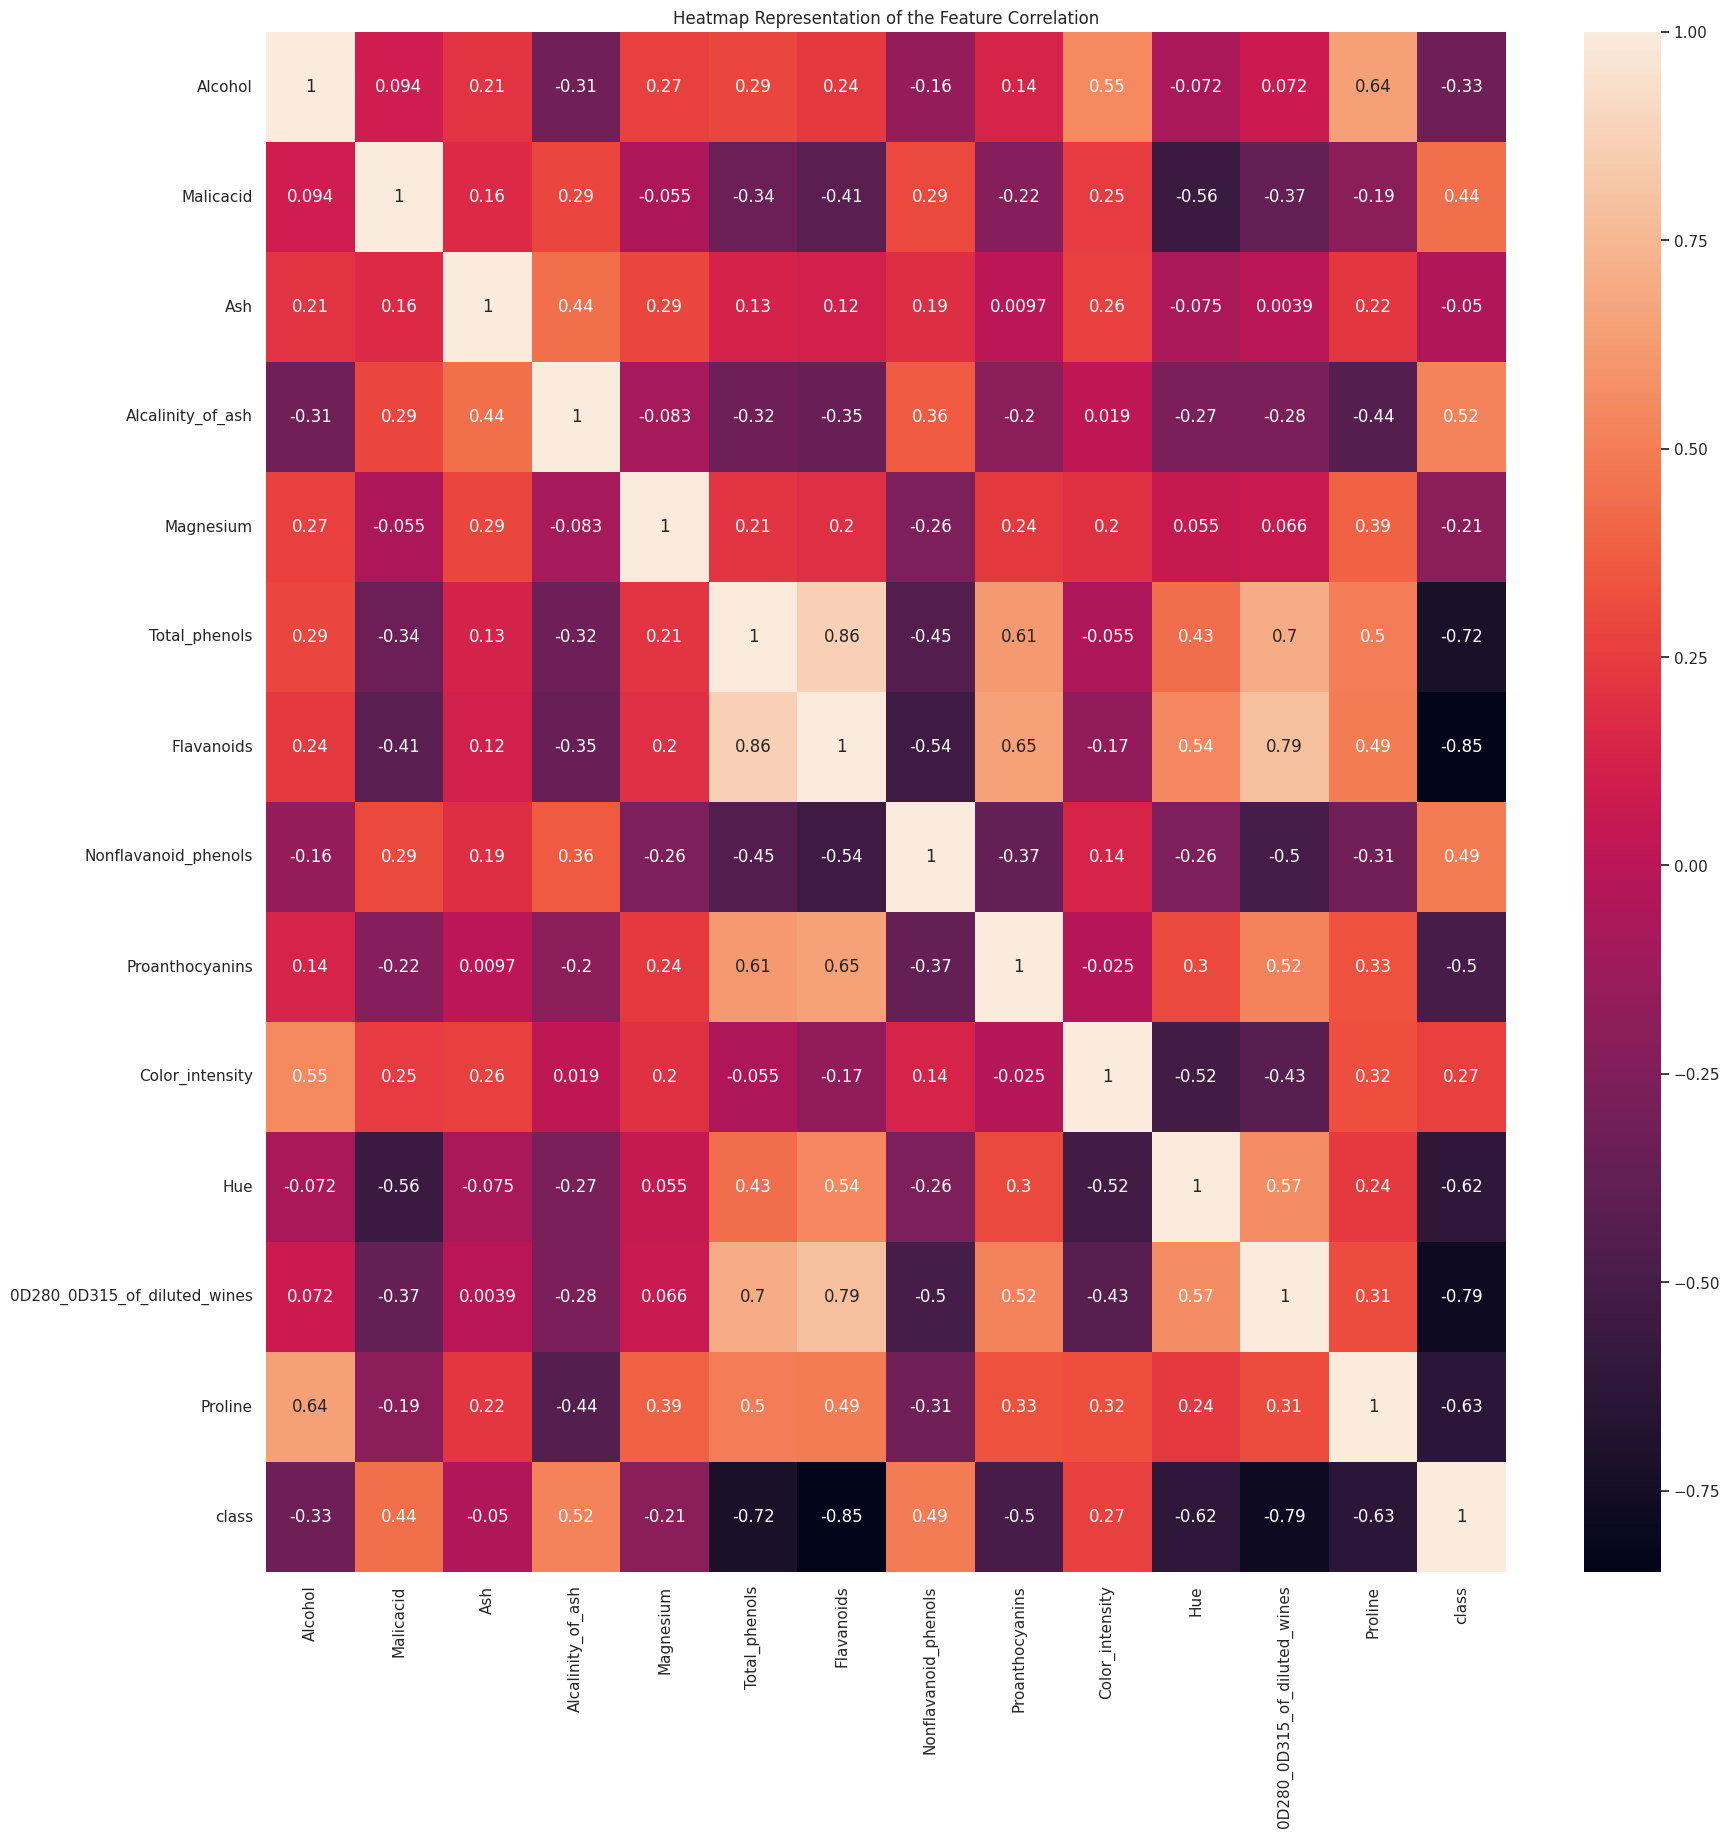

In [ ]:
# Heatmap representation of the feature correlation.

# set figure size to be 20,20
ax = plt.figure(figsize=(20,20))

# tell seaborn to invoke a heatmap grapth
ax = sns.heatmap(cor_matrix,annot=True)

# set the ylim of the heatmap
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

# Give the heatmap a title
plt.title('Heatmap Representation of the Feature Correlation') # title

# output the heatmap plot visualising the feature correlation of each feature in a new visual.
plt.plot()

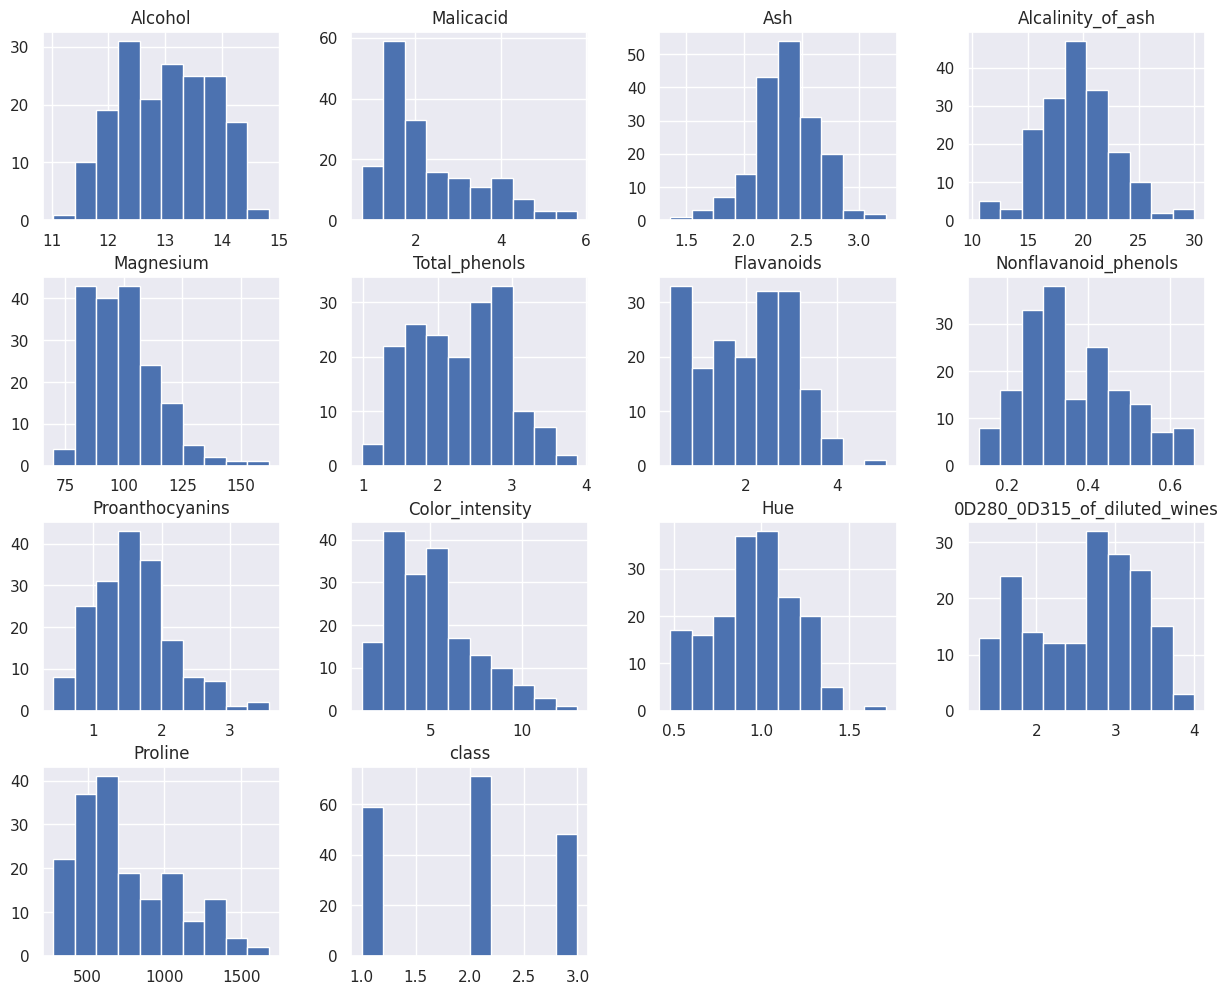

In [ ]:
# Histogram of the df features

# Build the histograms
df.hist(bins=10, figsize=(15,12))

# Title and output the histograms
plt.title('Histograms of each Feature')
plt.show()

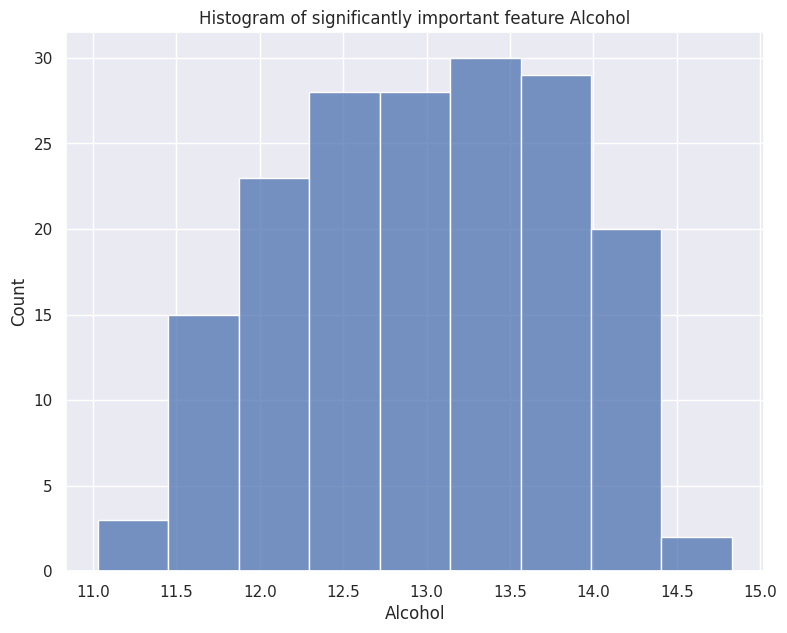

In [ ]:
# Larger histographic plot of the Alcohol feature

# set seaborn style
sns.set_style(style="darkgrid")

# build the distplot to use the feature 'Alcohol'
sns.histplot(df['Alcohol'])

# Output the Distribution graph of Feature 'Alcohol'
plt.title('Histogram of significantly important feature Alcohol')
plt.show()

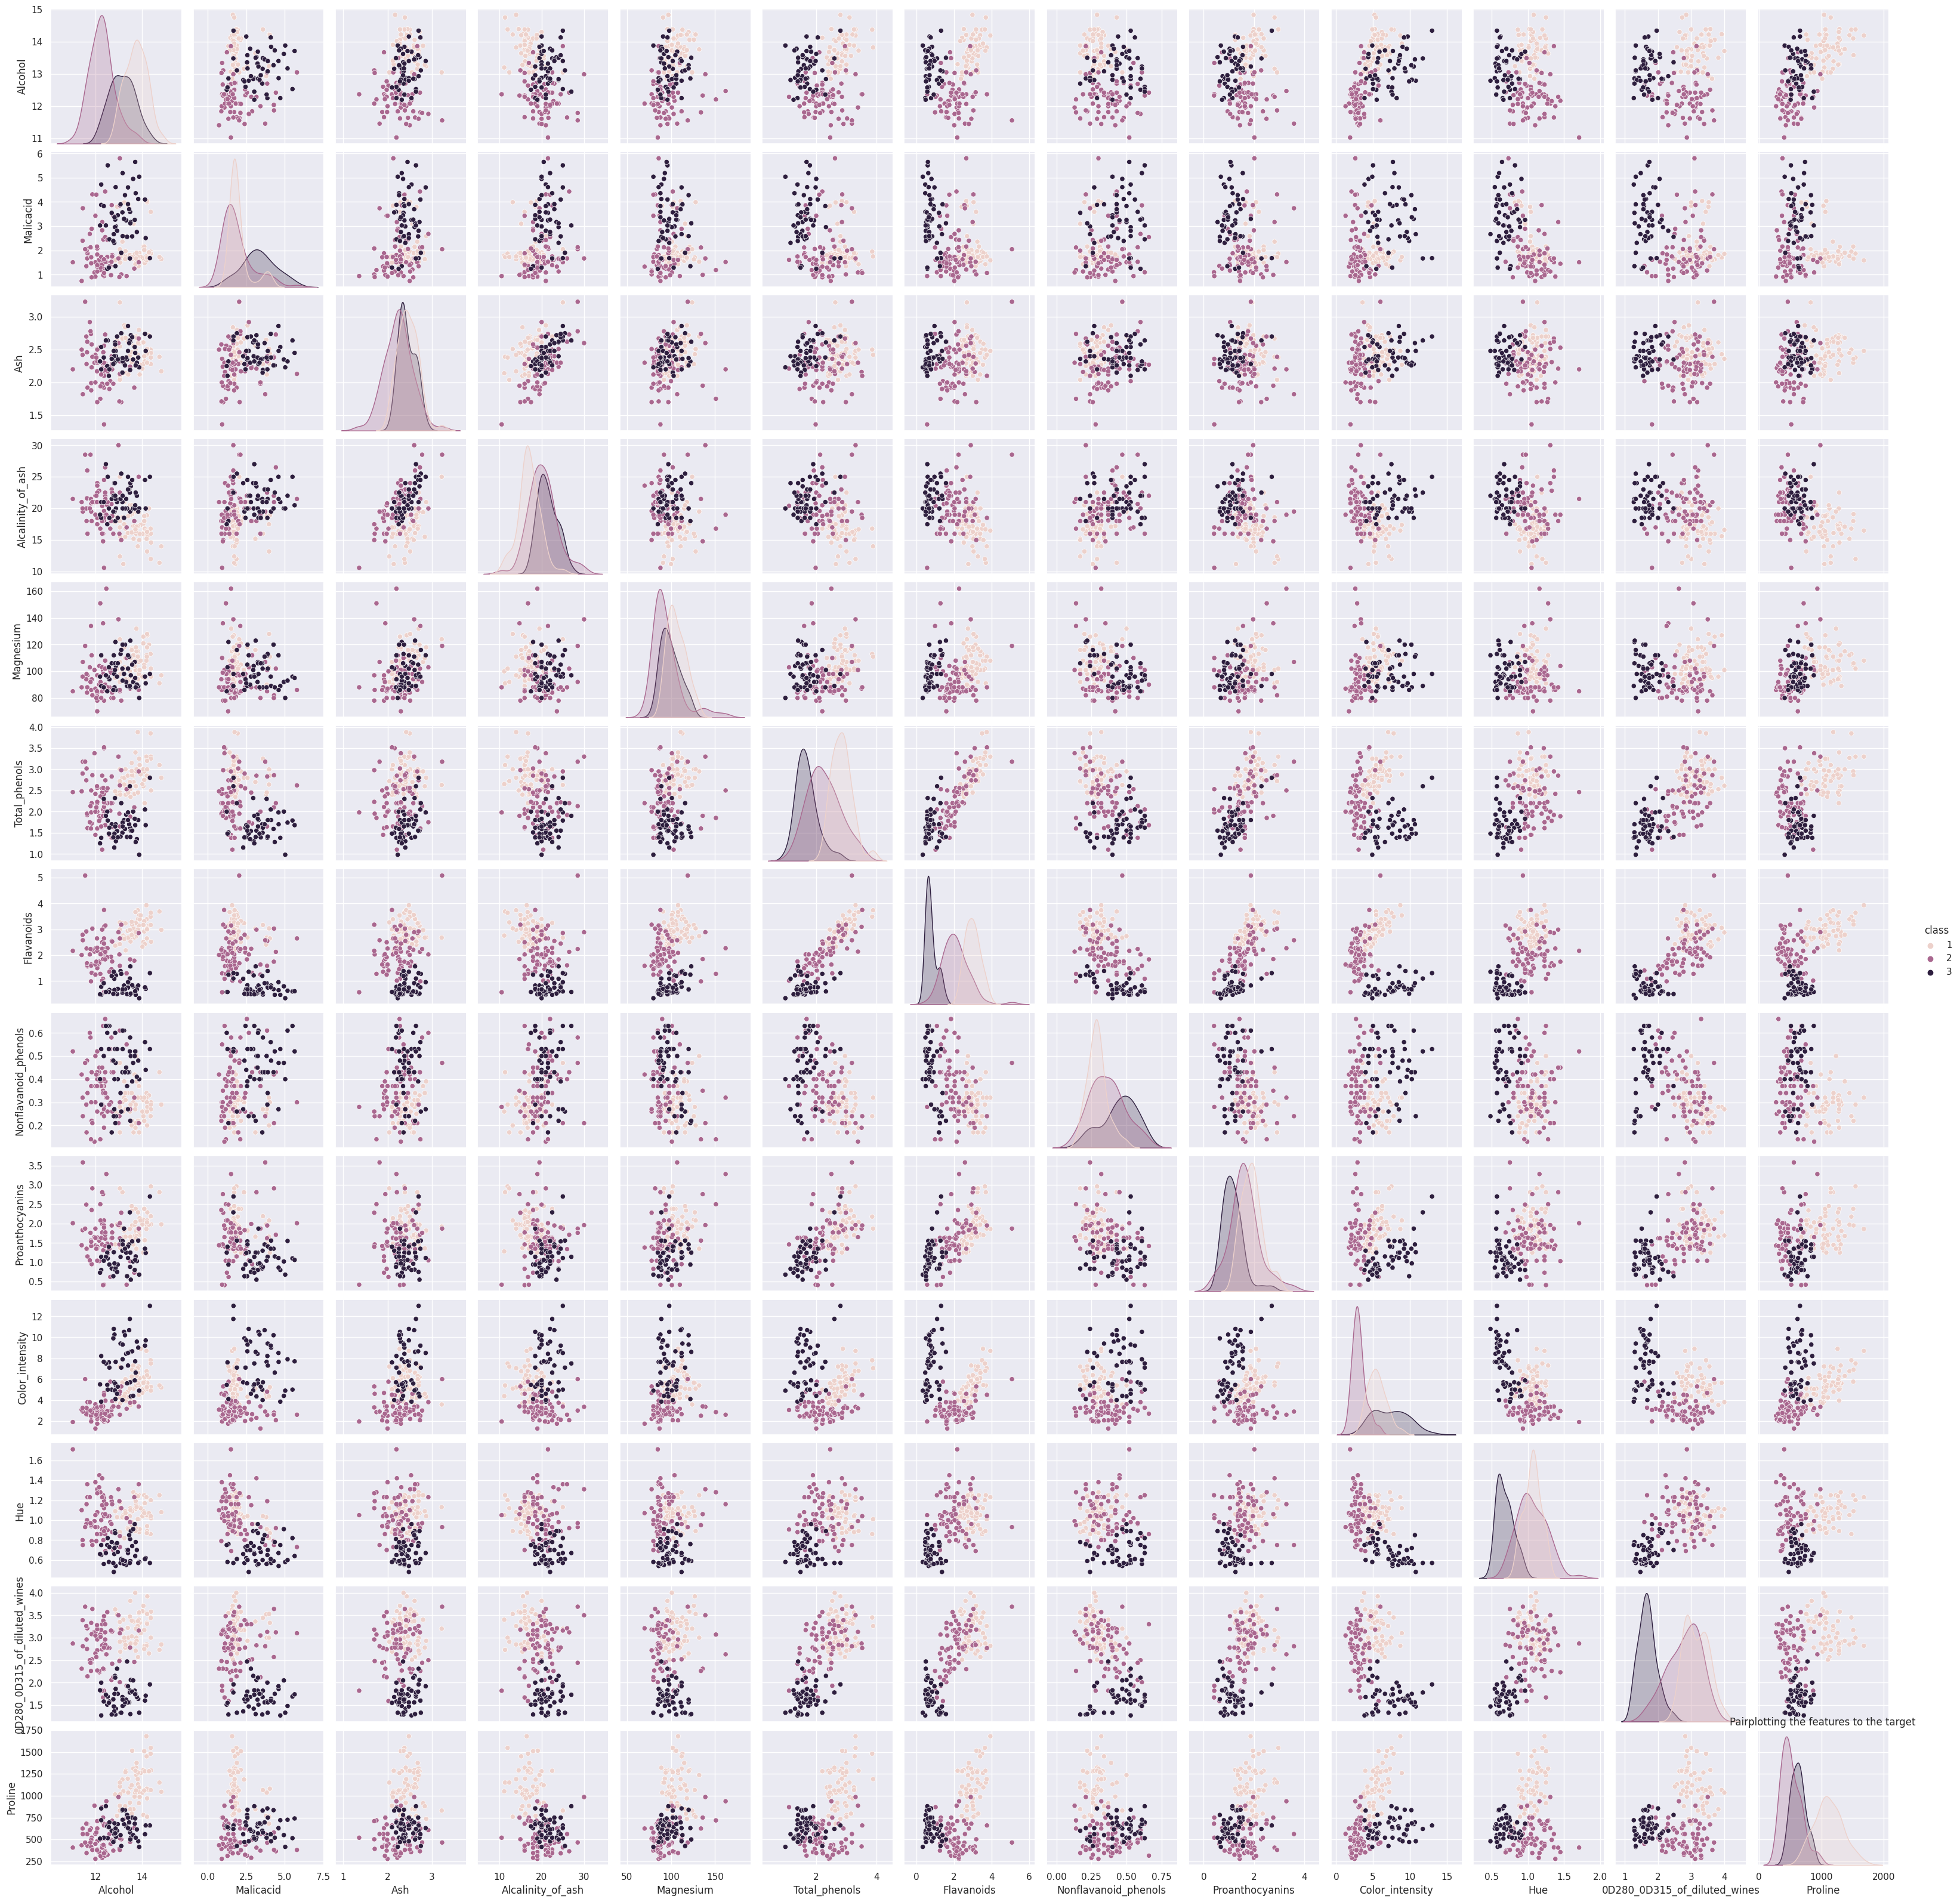

In [ ]:
# declare column names to be the features of the 'df' dataframe
cols_names = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline', 'class']

# create a pairplot, plotting each column in regards to the class
sns.pairplot(df[cols_names], hue='class')

# Ensuring the pairplot has a title
plt.title('Pairplotting the features to the target') # title

# Output the pairplot showcasing the values of each feature in regards to the target 'class'
plt.show()

The above pairplots show a diverse range of feature relations to the class.

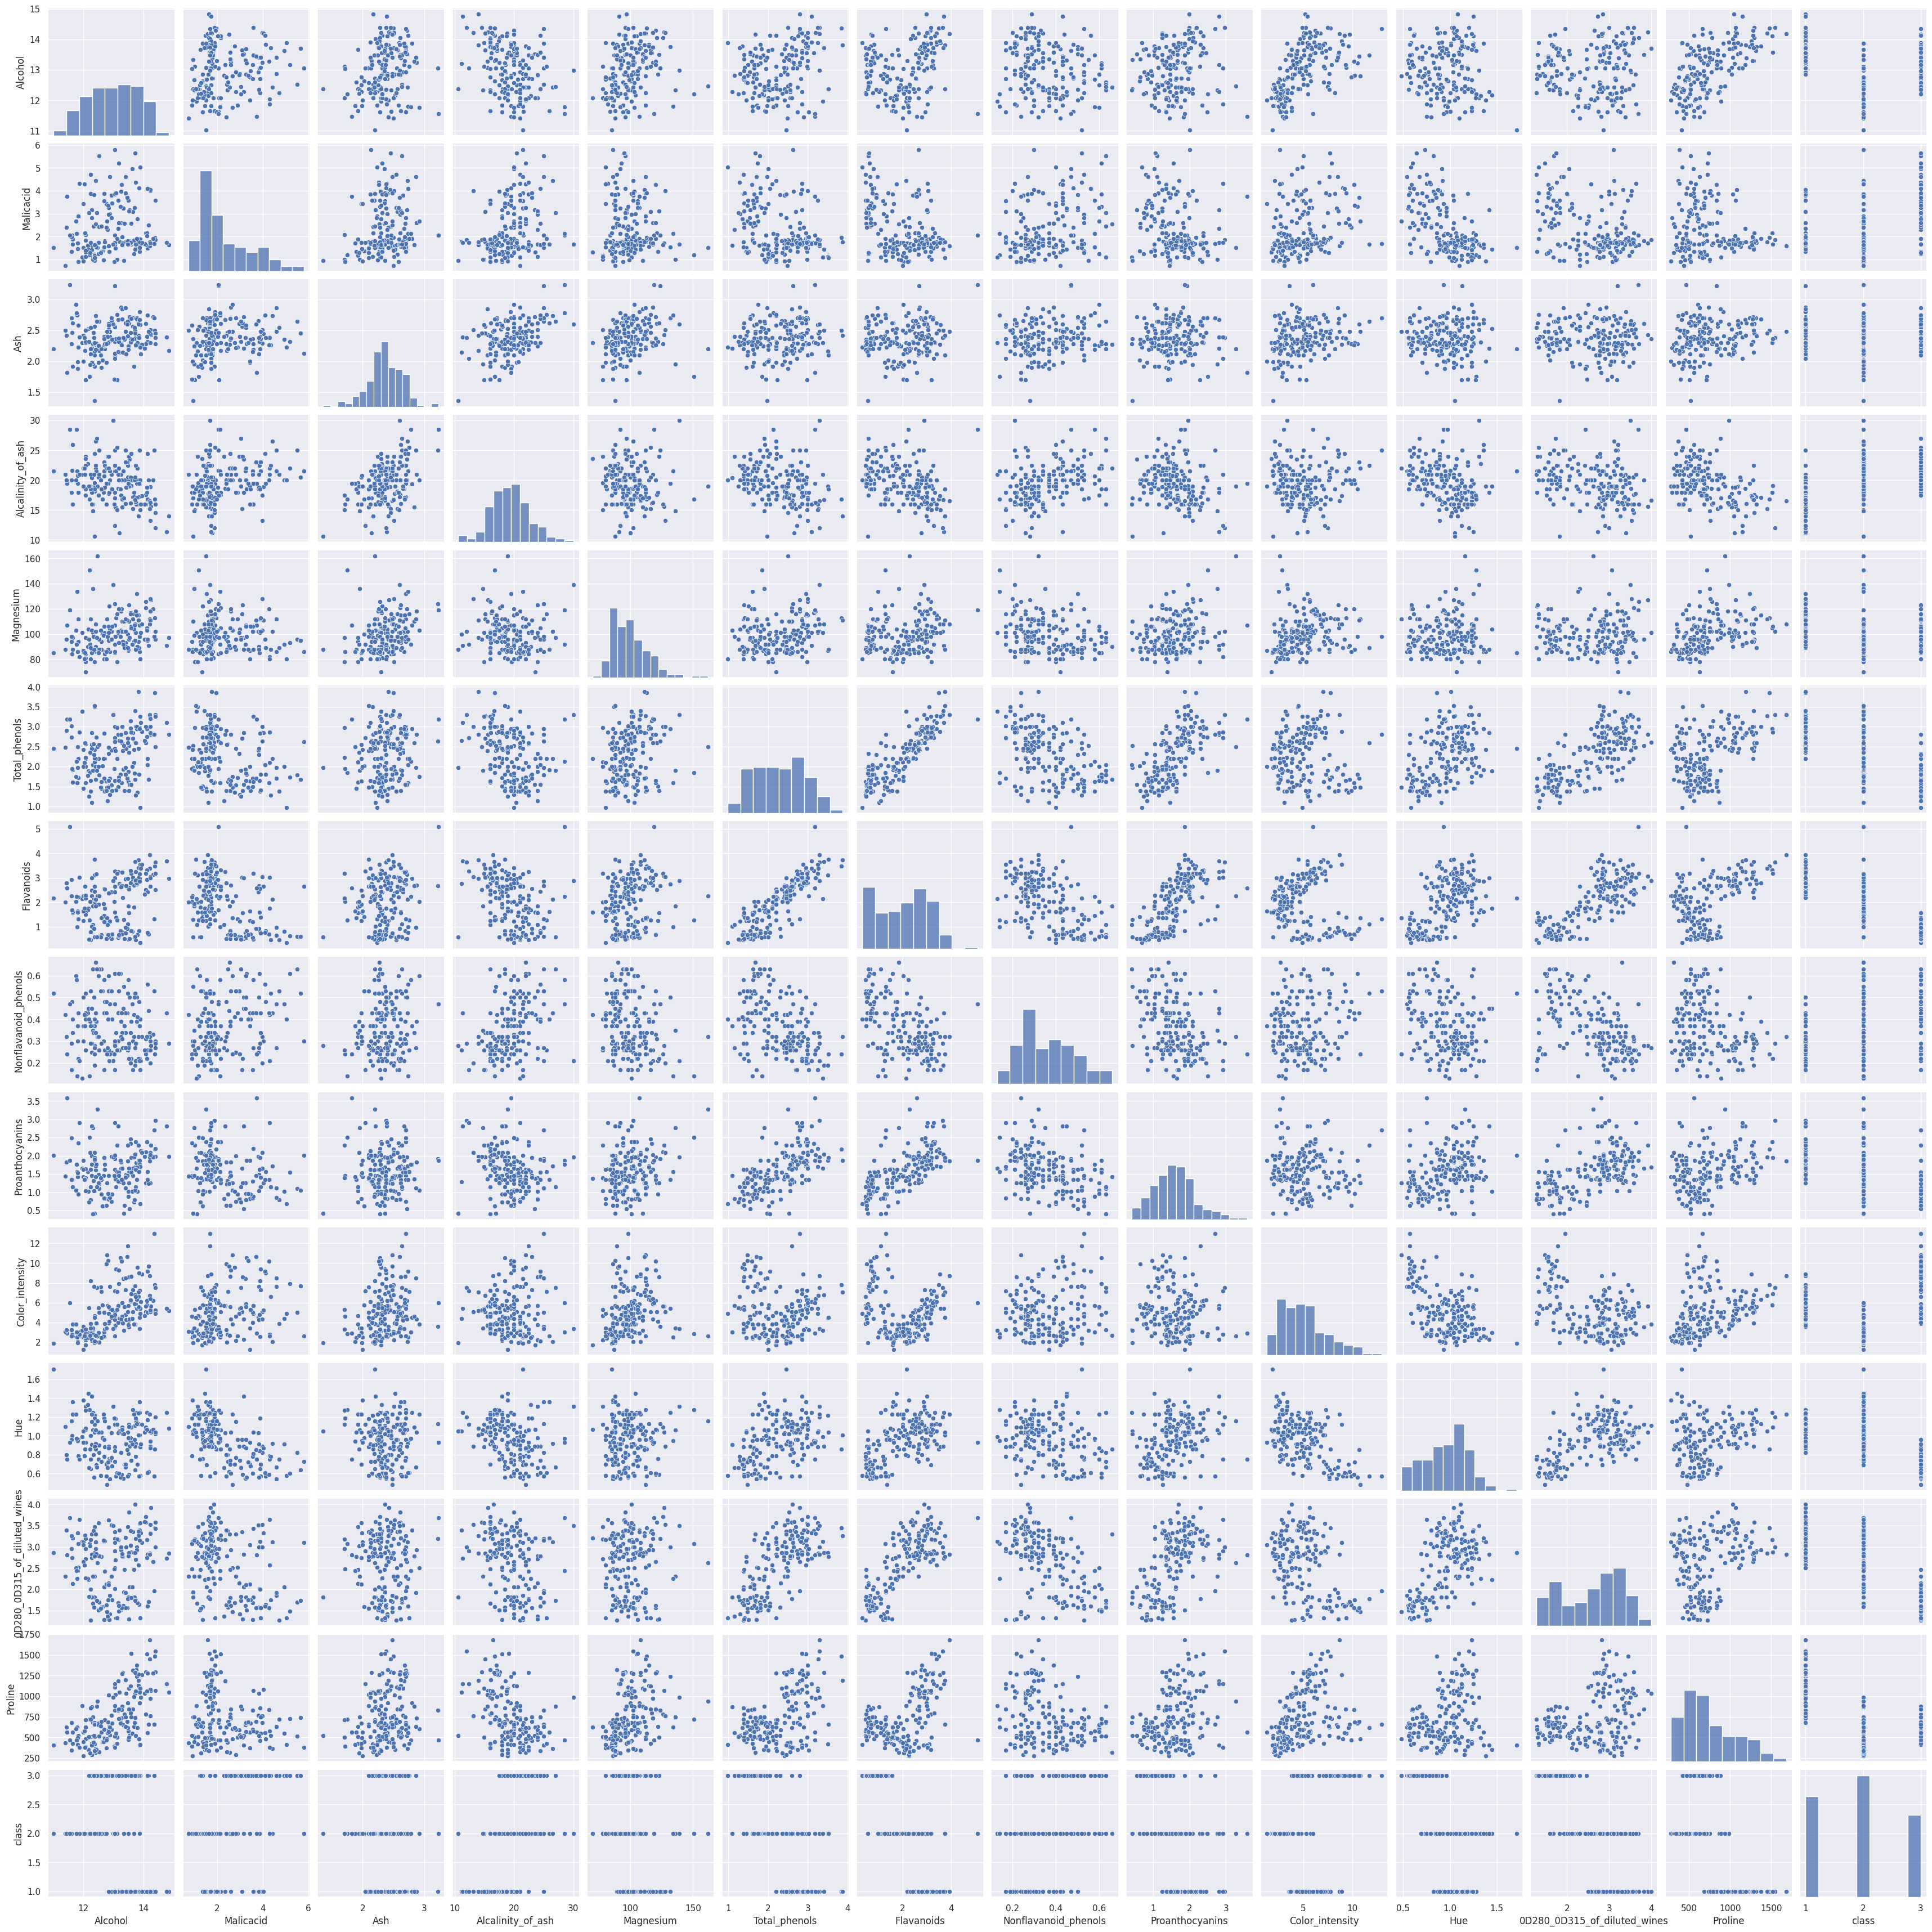

In [ ]:
# Scatter Matrix of the df dataframe

# Output the scatter matrix of the 'df' dataframe
sns.pairplot(df)

The scatter matrix also shows very diverse and scattered visualisation.

In [ ]:
# Output features that have less than 10 unique values

# loop for each feature in the dataframe
for i in df.columns:

  # if unique values is less than 10
  if len(df[i].unique())<10:

    # output the feature name and their unique values
    print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')

class has 3 unique values, These are: [1 2 3]


As expected, the target wine class is the only feature which has a small number of unique values as they are what classifies every instance of wine and need to be uniquely identified in-order to easily classify them.

In [ ]:
# Save the dataframe to a csv file called 'wine.csv' in current working space.
df.to_csv('wine.csv', index = False)

The model can be saved very easily locally under the filename 'wine.csv'. Allowing for a local copy and not  converting the models UCI url to a csv file.

In [ ]:
# Find features with correlation coefficient > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Output said droppable feature
print(f'The feature that you could drop is {to_drop}')

The feature that you could drop is ['Flavanoids']


As the coefficient limit is not that high, compared to 90 per-cent, the feature 'Flavanoids' will not be dropped as it still could potentially lead to greater performance in the model.

## **Section 2: Modelling/ Classification**

In [ ]:
# Display the first 5 instances of dataframe 'df' to remind of struct
df.head()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

We can see that each of our instances are displayed with the expected data and that the target class 'class' that determines the wine type is also present.

### **Splitting the Dataset**

In [ ]:
# split the data into it's features and a Target in form (X, y)
features = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'] # all input features bar the target feature

X = df[features] # features
y = df['class'] # target

Above we declare the input features of the dataset in long form.
And more importantly split the dataframe into two datasets. One named x for the dataframes input features. And one named y for the datasets classification target 'class'. We do this so that it is easier to work on the input features without impacting the target feature and vice-versa.

In [ ]:
# Output the type of the above split dataframes

print(f'The type of X is {type(X)}') # for object X
print(f'The type of y is {type(y)}') # for object y

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


The X features data is given as a pandas DataFrame and the y target class data is given as type pandas Series.

In [ ]:
# Import test split dependencies
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training data and 20% testing data, note the zero random state
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

We create training and testing data, with the ratio specified 80:20 (training to testing).

In [ ]:
# Get the dependency for normalising the below datasets
from sklearn import preprocessing

# Create normalized feature datasets
normalized_X_train = preprocessing.normalize(X_train) # for normalising the training data
normalized_X_test = preprocessing.normalize(X_test) # for normalising the testing data

Above the training and testing set could be pre processing to be normalised.

In [ ]:
# Identifying numerical and categorical variables

# defining a numerical variable
num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns

# defining a categorical variable
cat_vars = X_train.select_dtypes(include=['object', 'bool']).columns

# Output the numerical and categorical findings (note that the dataset doesn't contain any categorical ones so it will be an empty array returned from the print statement)
print('Numerical Vars are ',num_vars)
print('Categorical vars are ',cat_vars)

Numerical Vars are  Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')
Categorical vars are  Index([], dtype='object')


Every feature in the feature dataset is a numerical variable and none are categorical. This means that we do not need to handle any categorical variables.

### **Building the Model**

In [ ]:
# Create and Train the Random Forest model

# Import sci-kit learn dependency for creating Random Forest classifiers
from sklearn.ensemble import RandomForestClassifier

# create an instance of the RandomForestClassifier to use on our data
rf = RandomForestClassifier(n_estimators=100,) # n_estimators set to 100 to begin with.

# fit the model on the projects training data
rf.fit(X_train,y_train)

RandomForestClassifier()

The above Random Forest Classifier model is built with initially 100 estimators.

### **Testing and Evaluating the Model**

In [ ]:
# Making Predictions

# Predicting the classes of the testing set of data
rf_predictions = rf.predict(X_test)

# Probabilitities of the predictions (note: the data is a 2d numpy array)
rf_probs = rf.predict_proba(X_test)

# output class probabilities
rf_probs

array([[0.97, 0.03, 0.  ],
       [0.01, 0.08, 0.91],
       [0.16, 0.83, 0.01],
       [0.96, 0.04, 0.  ],
       [0.14, 0.83, 0.03],
       [0.34, 0.56, 0.1 ],
       [0.97, 0.01, 0.02],
       [0.  , 0.12, 0.88],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.16, 0.64],
       [0.  , 0.12, 0.88],
       [1.  , 0.  , 0.  ],
       [0.21, 0.77, 0.02],
       [0.03, 0.  , 0.97],
       [0.  , 1.  , 0.  ],
       [0.93, 0.03, 0.04],
       [0.99, 0.01, 0.  ],
       [0.04, 0.36, 0.6 ],
       [0.99, 0.01, 0.  ],
       [0.42, 0.57, 0.01],
       [0.84, 0.14, 0.02],
       [0.73, 0.23, 0.04],
       [0.02, 0.97, 0.01],
       [0.  , 0.78, 0.22],
       [0.  , 1.  , 0.  ],
       [0.25, 0.67, 0.08],
       [0.  , 1.  , 0.  ],
       [0.03, 0.89, 0.08],
       [0.  , 0.  , 1.  ],
       [0.96, 0.03, 0.01],
       [1.  , 0.  , 0.  ],
       [0.01, 0.91, 0.08],
       [0.94, 0.03, 0.03],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ]])

In [ ]:
# Required imports for getting the accuracy and rounding it to make it more presentable
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Formulate the accuracy of the model
accuracy = accuracy_score(y_test, rf_predictions)

# Output the model accuracy of the RF model
print(f'The overall accuracy of the RF model is {np.round(accuracy*100,2)}%') # to 2 d.p.

The overall accuracy of the RF model is 97.22%


In [ ]:
# Output the confusion matrix of the RF model
print(confusion_matrix(y_test, rf_predictions))

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


In [ ]:
# Classification report of the newly created RF model
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



The model has highest precision on both class 1 and class 2 but lowest precision on class 3. Meaning the model is good at classifing both class 1 and 2 in relation to class 3 where it performs worst at.

In [ ]:
# store both the class labels and the predictions into one pandas dataframe
results = pd.DataFrame({'Actual':y_test, 'Predicted':rf_predictions})

# Output 5 result instances and showcase the model in-action, with the actual result and the model's predicted results.
results.head()

Actual  Predicted
54        1          1
151       3          3
63        2          2
55        1          1
123       2          2

For the brief head above, all Predicted values equate to the Actual, meaning the model has successfully predicted all these result values.

In [ ]:
# Display each features importance

# create features_importance array
features_importance = []

# loop for each feature and feature importance
for name, score in zip(cols_names, rf.feature_importances_):

  # store into the features importance dictionary with the structure Feature:, Importance:
  features_importance.append({'Feature':name, 'Importance':score})

# show the feature importances of each feature unsorted
features_importance[:14]

[{'Feature': 'Alcohol', 'Importance': 0.11387718930524451},
 {'Feature': 'Malicacid', 'Importance': 0.023924133655822886},
 {'Feature': 'Ash', 'Importance': 0.009450990294298174},
 {'Feature': 'Alcalinity_of_ash', 'Importance': 0.02217449901734825},
 {'Feature': 'Magnesium', 'Importance': 0.0258938118072017},
 {'Feature': 'Total_phenols', 'Importance': 0.059611242639180176},
 {'Feature': 'Flavanoids', 'Importance': 0.1615525289654865},
 {'Feature': 'Nonflavanoid_phenols', 'Importance': 0.01941243806374631},
 {'Feature': 'Proanthocyanins', 'Importance': 0.017476003090525185},
 {'Feature': 'Color_intensity', 'Importance': 0.19390509833384342},
 {'Feature': 'Hue', 'Importance': 0.07016617912520176},
 {'Feature': '0D280_0D315_of_diluted_wines',
  'Importance': 0.15087770600246306},
 {'Feature': 'Proline', 'Importance': 0.1316781796996382}]

In [ ]:
# Sorted feature importance
import operator

# Sort by Importance
features_importance.sort(key=operator.itemgetter('Importance'))
# Output the features importance
features_importance

[{'Feature': 'Ash', 'Importance': 0.009450990294298174},
 {'Feature': 'Proanthocyanins', 'Importance': 0.017476003090525185},
 {'Feature': 'Nonflavanoid_phenols', 'Importance': 0.01941243806374631},
 {'Feature': 'Alcalinity_of_ash', 'Importance': 0.02217449901734825},
 {'Feature': 'Malicacid', 'Importance': 0.023924133655822886},
 {'Feature': 'Magnesium', 'Importance': 0.0258938118072017},
 {'Feature': 'Total_phenols', 'Importance': 0.059611242639180176},
 {'Feature': 'Hue', 'Importance': 0.07016617912520176},
 {'Feature': 'Alcohol', 'Importance': 0.11387718930524451},
 {'Feature': 'Proline', 'Importance': 0.1316781796996382},
 {'Feature': '0D280_0D315_of_diluted_wines',
  'Importance': 0.15087770600246306},
 {'Feature': 'Flavanoids', 'Importance': 0.1615525289654865},
 {'Feature': 'Color_intensity', 'Importance': 0.19390509833384342}]

The above feature importance shows us that the most important feature in our model is the 'Color_intesntiy' feature and the least important feature being the 'Nonflavanoid_phenols'.

In [ ]:
# Saving the Dataset using pickle
import pickle

# Set filename in current directory
pkl_filename = "rf_model.pkl"

# Saving the model using the filename aove

# Loading the modeling from the pickle file
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf, file)

The above code-block allows for saving the dataset using pickle. For easy saving/loading functionality, that if the dataset gets corrupted it can easily be saved by loading the saved dataset at this point.

In [ ]:
# Loading from the model file
with open(pkl_filename, 'rb') as file:
  rf_model = pickle.load(file)

# A simple score test
score = rf_model.score(X_test, y_test)

As above, this allows for loading of the dataset.

In [ ]:
# Make predictions across every dataframe
preds = rf_model.predict(np.array(df.iloc[:,:-1]))

# create a new data frame using dictionary
results = pd.DataFrame({'Actual':df['class'],'Predicted':preds})

# lets first add the classification results to a copy of the original dataframe
df_results = pd.concat([df, results], axis=1)

# show first five rows and last five columns in the dataset we created
df_results.iloc[5:,-5:].head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0D280_0D315_of_diluted_wines  Proline  class  Actual  Predicted
5                          2.85     1450      1       1          1
6                          3.58     1290      1       1          1
7                          3.58     1295      1       1          1
8                          2.85     1045      1       1          1
9                          3.55     1045      1       1          1

In [ ]:
# lets compare predictions against actual wine class
check_predictions = np.where(df_results['Actual'] == df_results['Predicted'],True, False)

# add a isCorrect column
df_results['isCorrect']=check_predictions

# Output first five and last five instances and show the isCorrect feature
df_results.iloc[5:,-5:].head()

Proline  class  Actual  Predicted  isCorrect
5     1450      1       1          1       True
6     1290      1       1          1       True
7     1295      1       1          1       True
8     1045      1       1          1       True
9     1045      1       1          1       True

The model performs all the correct predictions on the results above.

In [ ]:
# group by columns that are only correctly classified
correct_insts = pd.DataFrame(df_results[df_results.isCorrect==True].groupby(['class'])['isCorrect'].count()).reset_index()

# change headers to display the wine class and the count of incorrect values
correct_insts.columns = ['Class','Count']

# Output the correct instances
correct_insts

Class  Count
0      1     59
1      2     70
2      3     48

In [ ]:
# get instances of incorrectness and group them
incorrect_insts = pd.DataFrame(df_results[df_results.isCorrect!=True].groupby(['class'])['isCorrect'].count()).reset_index()

# change headers to display the wine class and the count of incorrect values
incorrect_insts.columns = ['Class','Count']

# output the incorrect instances
incorrect_insts

Class  Count
0      2      1

With an accuracy rate of 97% it is fair to say this model can successfully classify wine types. The model only got wine class 2 incorrect twice, therefore the model is quite error-proof in this instance.

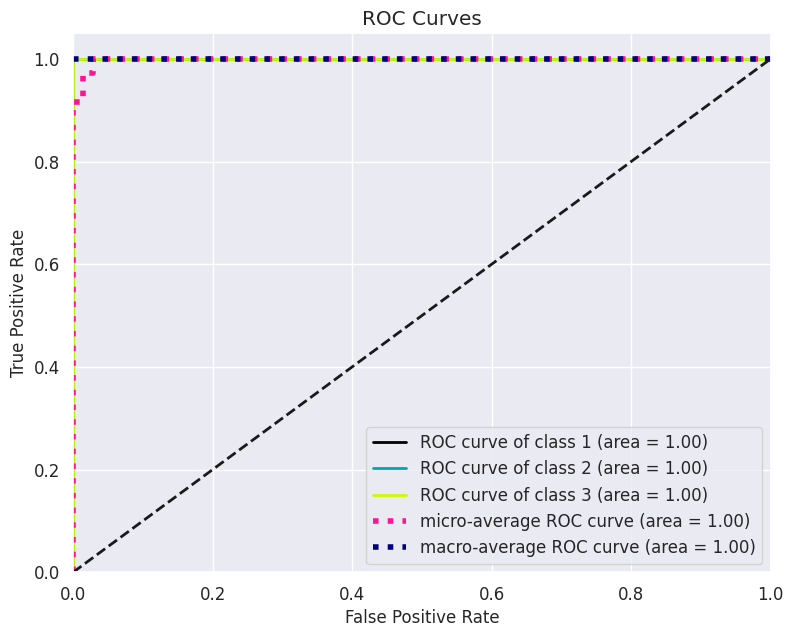

In [ ]:
# ROC Curves

!pip install scikit-plot

## ROC dependecy
import scikitplot as skplt

# determine y probas
y_probas = rf.predict_proba(X_test)

# build the ROC curve with the y testing data and the y probas
fig = skplt.metrics.plot_roc(y_test, y_probas)

# Output ROC Curves
plt.show()

As each curve class (1-3) is extremely close to the top-left corner (TPR 1.0) this means our model is great at correctly identifying positives.

### **Results Report**

### **The Report**
Based on the Modelling built above my Random Forest model was built using 100 n_estimators and 20% training data. It was created in order to classify wine and in evaluation does indeed classify wine to their wine class type. It performs well with over 97% accuracy without any fine tuning or partition changes as of yet. And out of 178 instances only incorrectly classified once. Thereby fullfilling the model's aim of classifying wine via it's chemical makeup into a reality.

### **A Discussion on the Results**

The results reported on above were to be expected, as a perfect accuracy rating might indicate to the model overfitting which is not desirable. Furthermore the lack of general solution improvement such as fine tuning the parameters of the model, comparing different models and paritioning the training data to be more than previously fitted all could make the solution better and improved. Therefore there is still leeway opurtunity to enhance the models solution.

### **My Interpretation of the Results**

I believe that the aims of the model have been successfully achieved as the model can correctly identify wine class based on their chemical features. Thereby smashing the aim of the model by classifying wine types.

## **Section 3: Solution Improvement**

### **Fine-tuning the Model**

In [ ]:
# Increase the n_estimators by a margin of 400, previously was 100 to test if we can increase the accuracy
rf_fine = RandomForestClassifier(n_estimators=500,) # increasing to 500

# Build and fit the model
rf_fine.fit(X_train,y_train)

# Get model accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Output the model accuracy
print(f'The overall accuracy of the RF model is {np.round(accuracy*100,2)}%')

The overall accuracy of the RF model is 97.22%


Fine-tuning the number of estimators to count 500 actually decreased the accuracy of the model by on average 3%. Therefore this action did not fine-tune the model. Thereby just arbritary increasing the number of estimators does not always increase the accuracy of the model and may have harmed the solution rather than improve it.

In [ ]:
# Increase the n_estimators by a margin of 100, previously was 100 to test if we can increase the accuracy
rf_fine = RandomForestClassifier(n_estimators=200,) # decreasing to 200

# Build and fit the model
rf_fine.fit(X_train,y_train)

# Get model accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Output the model accuracy
print(f'The overall accuracy of the RF model is {np.round(accuracy*100,2)}%')

The overall accuracy of the RF model is 97.22%


Whereas if we set the number of estimators to 200 we see that.

### **Changing Metrics of the Model**

As the data is already pretty balanced there is no need in further modifying the balance of the 'class' target. The above fine-tuning of the model also shows that the model is already at the best it can be roughly as changing most of the parameters as seen above can decrease the performance and accuracy of the model thereby not improving the solution in any meaningful way.

### **Comparing Models**

Below the vanilla RF model is compared with in sequence, DT, RF and SVM models to get a wideful comparison so that the model can be evaluated on a diverse set of models.

In [ ]:
# Create a DT model in order to compare the RF model

# Import DT dependency
from sklearn.tree import DecisionTreeClassifier

# create a dt classifier
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# pass it the training data
clf.fit(X_train, y_train)

# make predictions for whole testing set
predictions = clf.predict(X_test)

# get accuracy of the DT model
accuracy = clf.score(X_test, y_test)

# Output accuracy of the DT model
print(f'The Model Accuracy is {round(accuracy*100,2)}%')

The Model Accuracy is 80.56%


As the base RF model had an accuracy rating of 97%, this is a decrease of 17% meaning that the Decision Tree model is less efficient and accurate than the RF model.

In [ ]:
# Create a SVM model also in order to compare with the RF model

# SVM dependencies
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# create dimenssion reduction
pca = PCA(n_components=2, whiten=True, random_state=42)

# Set the svc model to use the 'rbf' kernel and have a balanced class weight
svc = SVC(kernel='rbf', class_weight='balanced')

# set model pipline
model = make_pipeline(pca, svc)

# Import train test split method
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import SVM sklearn dependency
from sklearn.model_selection import GridSearchCV

# Set param grid dictionaries values
param_grid = {'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Declare the grid
grid = GridSearchCV(model, param_grid)
# fit the data onto the grid
grid.fit(X_train, y_train)
# Get the best_params
best_params = grid.best_params_

# Output the accuracy of the SVM model
accuracy = grid.score(X_test, y_test)
print(f'The Model Accuracy is {round(accuracy*100,2)}%')

The Model Accuracy is 77.78%


The SVM model is almost 20% less accurate than the base RF model.

In [ ]:
# Create a LR model to compare to the base RF model

# Required linear scikit model dependency
from sklearn.linear_model import LogisticRegression

# build the model, set the solver to be of type 'lbfgs' and set the maximum number of iterations to be 3000
lg_model = LogisticRegression(solver='lbfgs',max_iter=3000)
lg_model.fit(X_train,y_train)

# define predicted values
y_pred = lg_model.predict(X_test)

# define actual values
actual = y_test

# Get and output the accuracy of the LR model
accuracy = lg_model.score(X_test, y_test)
print(f'The Model Accuracy is {round(accuracy*100,2)}%')

The Model Accuracy is 100.0%


The accuracy of the LR model may seem to be perfect but it is very possible this model has severly overfitted to the testing data. It is not worth the possibility of severe overfitting over the Random Forest model.

In conclusion I stand by my decision of chosing the Random Forest method as it generally does not overfit as often as LR or DT. The valiant accuracy of the model proves that the model can correctly classify wine via it's chemical makeup to it's wine classification of 1-3.

### **Changing the Models Partition**

In [ ]:
# Increasing the amount of training data given to the Model to determine if it improves the solution

# Increase the share of testing data to 40%, a 20% increase to determine if it can improve the solution.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state = 0)

In [ ]:
# Increase the n_estimators by a margin of 400, previously was 100 to test if we can increase the accuracy
rf_mod_partition = RandomForestClassifier(n_estimators=500,)

# Build and fit the model
rf_mod_partition.fit(X_train,y_train)

# Making Predictions

# Predicting the classes of the testing set of data
rf_predictions = rf.predict(X_test)

# Probabilitities of the predictions (note: the data is a 2d numpy array)
rf_probs = rf.predict_proba(X_test)

# output class probabilities
rf_probs

# Get model accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Output the model accuracy
print(f'The overall accuracy of the RF model is {np.round(accuracy*100,2)}%')

The overall accuracy of the RF model is 98.61%


The partition modified model above does have a slightly increased accuracy although this could just be random chance with the testing data. Overall the solution improvement had very little net-benefit to the pre-solution improved Random Forest model.

## **Section 4: Reproducibility and Presentation**

The model below and dataset in it's final form is saved, loaded to and tested on below to ensure that the model can easily be reproduced using pickle and presented from using the rf_model object.

### **Saving the Model**

In [ ]:
# Saving the Dataset using pickle
import pickle

# Set filename in current directory
pkl_filename = "rf_model.pkl"

# Saving the model using the filename above

# Loading the modeling from the pickle file
with open(pkl_filename, 'wb') as file:
  pickle.dump(rf, file)

The dataset and model in it's final state is saved to. Allowing for the easy backup and access to the final state of the dataset.

### **Loading the Model**

In [ ]:
# Loading from the model file
with open(pkl_filename, 'rb') as file:
  rf_model = pickle.load(file)

The dataset and model in it's final form gets loaded from in-order to test if the final state can be permutated and tested to.

### **Testing the Loaded Model**

In [ ]:
# Outputting the first classification to test if the model loads correctly
print(f'The first wine class in the testing set is of wine is of class:  {rf_model.predict(X_test[:1])}')

The first wine class in the testing set is of wine is of class:  [1]


The above code shows us that we can easily load and test the dataset and random forest model and make predictions very easily and further model invokations.